## Autómatas Celulares

https://matplotlib.org/matplotblog/posts/elementary-cellular-automata/

Una celda $C$ solo conoce el estado de sus vecinos izquierdo y derecho, llamados $L$ y $R$ respectivamente. Podemos definir la función o regla $f(L, C, R)$ que mapea el estado de la celda a 0 o 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rng = np.random.RandomState(42)
data = rng.randint(0, 2, 20)

print(data)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]


In [3]:
#Since our input cells are binary values there are 2^3 = 8 possible inputs into the function.
for i in range(8):
    print(np.binary_repr(i, 3))

000
001
010
011
100
101
110
111


In [4]:
#“Rule 30” could be constructed by first converting to binary and then building an array for each bit
rule_number = 30
rule_string = np.binary_repr(rule_number, 8)
rule = np.array([int(bit) for bit in rule_string])
print(rule)

[0 0 0 1 1 1 1 0]


In [5]:
#By convention the Wolfram code associates the leading bit with ‘111’ and the final bit with ‘000’. 
#For rule 30 the relationship between the input, rule index and output is as follows:
for i in range(8):
    triplet = np.binary_repr(i, 3)
    print(f"input:{triplet}, index:{7-i}, output {rule[7-i]}")

input:000, index:7, output 0
input:001, index:6, output 1
input:010, index:5, output 1
input:011, index:4, output 1
input:100, index:3, output 1
input:101, index:2, output 0
input:110, index:1, output 0
input:111, index:0, output 0


In [6]:
#We can define a function which maps the input cell information with the associated rule index. 
#Essentially we are converting the binary input to decimal and adjusting the index range.
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4*L + 2*C + R)
    return int(index)

In [7]:
rule[rule_index((1, 0, 1))]

0

In [8]:
rule[rule_index((0, 0, 1))]

1

In [9]:
#Finally, we can use Numpy to create a data structure containing all the triplets for our state array
#and apply the function across the appropriate axis to determine our new state.
all_triplets = np.stack([
    np.roll(data, 1),
    data,
    np.roll(data, -1)]
)
new_data = rule[np.apply_along_axis(rule_index, 0, all_triplets)]
print(new_data)
#That is the process for a single update of our cellular automata.

[1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1]


In [10]:
#To do many updates and record the state over time, we will create a function.
def CA_run(initial_state, n_steps, rule_number):
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    m_cells = len(initial_state)
    CA_run = np.zeros((n_steps, m_cells))
    CA_run[0, :] = initial_state

    for step in range(1, n_steps):
        all_triplets = np.stack(
            [
                np.roll(CA_run[step - 1, :], 1),
                CA_run[step - 1, :],
                np.roll(CA_run[step - 1, :], -1),
            ]
        )
        CA_run[step, :] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]

    return CA_run

In [12]:
initial = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])
data = CA_run(initial, 10, 30)
print(data)

[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]]


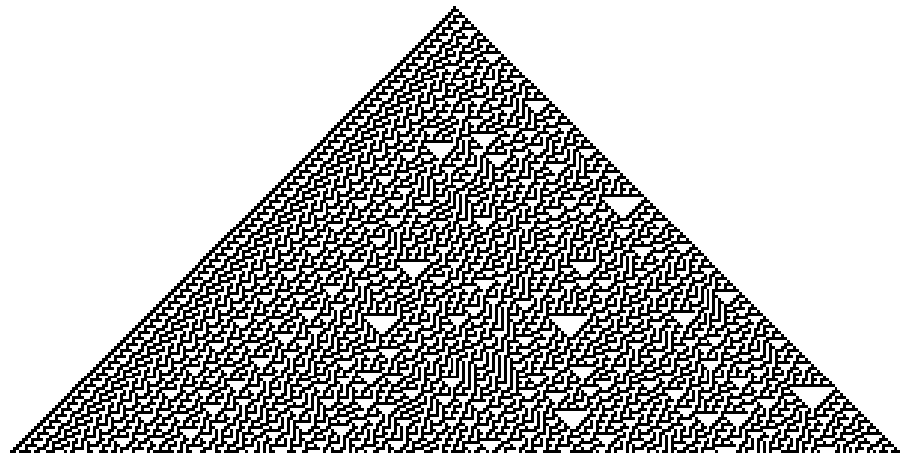

In [28]:
#A single 1 is initialized, with all other values set to zero.
initial = np.zeros(300)
initial[300//2] = 1
data = CA_run(initial, 150, 30)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

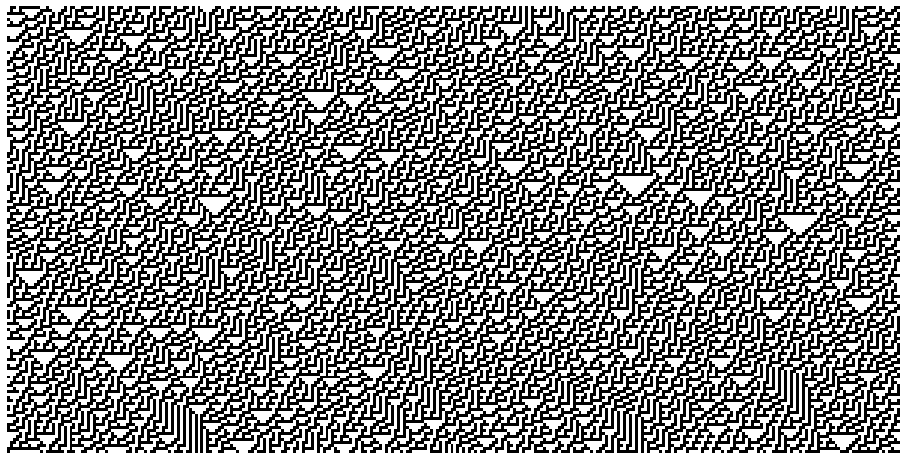

In [14]:
#With random initial state
plt.rcParams['image.cmap'] = 'binary'

rng = np.random.RandomState(0)
data = CA_run(rng.randint(0, 2, 300), 150, 30)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

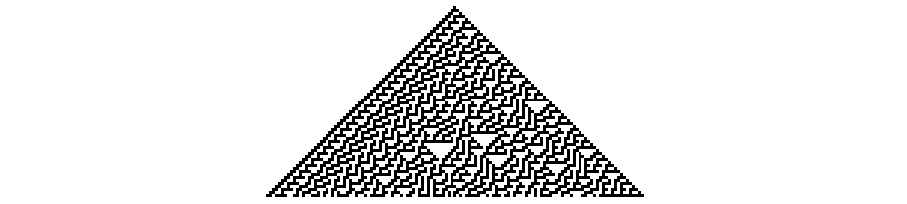

In [15]:
#A single 1 is initialized, with all other values set to zero.
initial = np.zeros(300)
initial[300//2] = 1
data = CA_run(initial, 64, 30)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

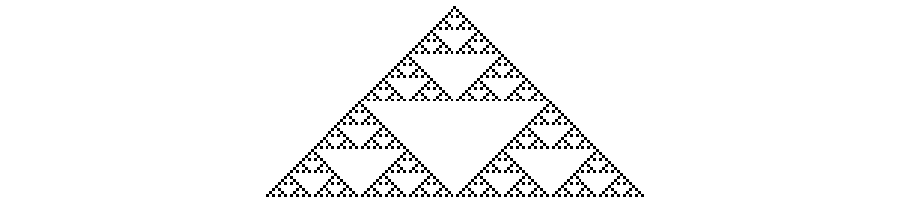

In [16]:
#A single 1 is initialized, with all other values set to zero.
initial = np.zeros(300)
initial[300//2] = 1
data = CA_run(initial, 64, 26)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

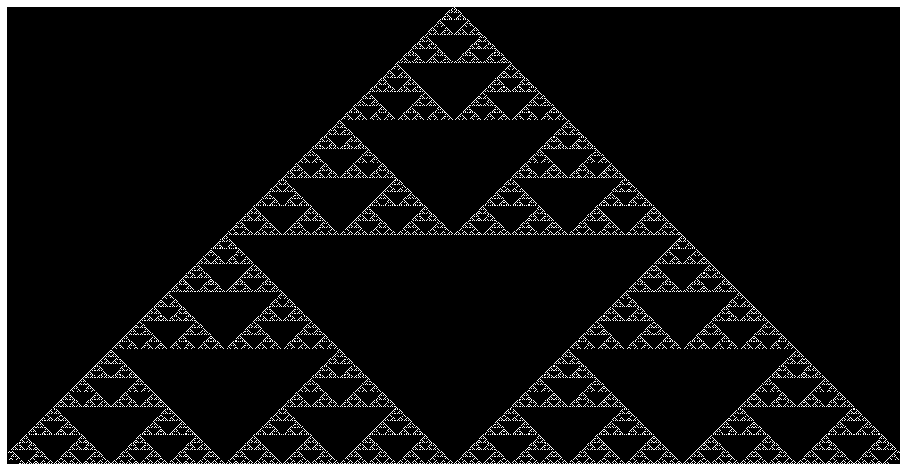

In [24]:
#A single 1 is initialized, with all other values set to zero.
w=1000
initial = np.zeros(w)
initial[w//2] = 1
data = CA_run(initial, 512, 165)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

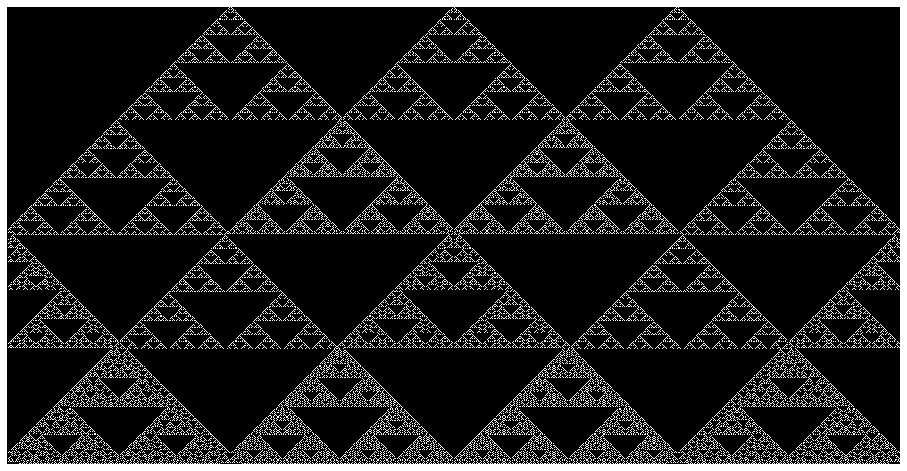

In [27]:
#A single 1 is initialized, with all other values set to zero.
w=1000
initial = np.zeros(w)
initial[w//2] = 1
initial[w//4] = 1
initial[3*w//4] = 1
data = CA_run(initial, 512, 165)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

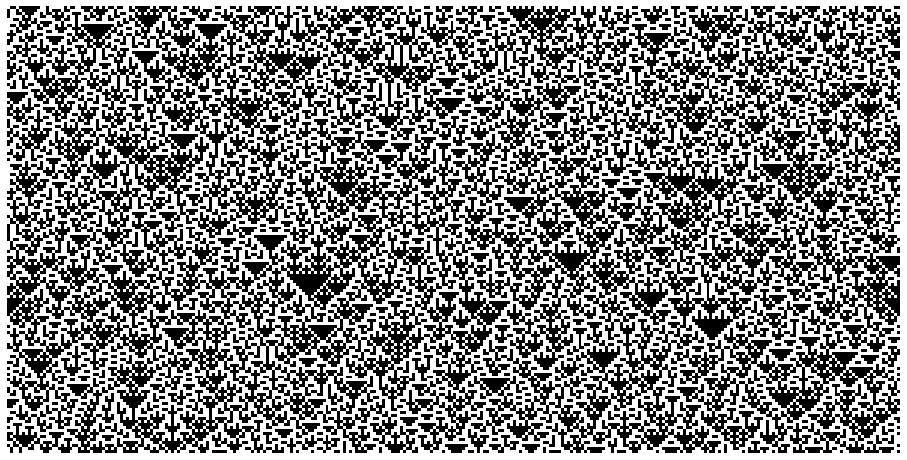

In [26]:
#With random initial state
plt.rcParams['image.cmap'] = 'binary'

rng = np.random.RandomState(0)
data = CA_run(rng.randint(0, 2, 300), 150, 165)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

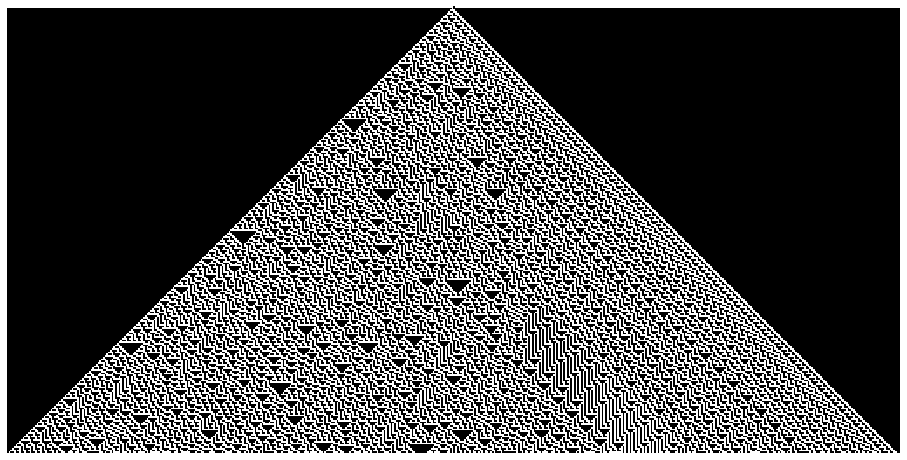

In [36]:
#A single 1 is initialized, with all other values set to zero.
w=512
initial = np.zeros(w)
initial[w//2] = 1
data = CA_run(initial, w//2, 149)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

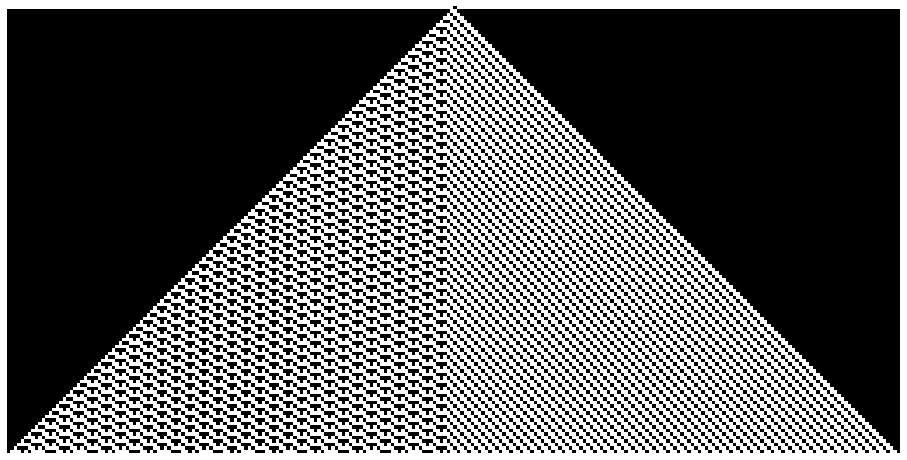

In [40]:
#A single 1 is initialized, with all other values set to zero.
w=256
initial = np.zeros(w)
initial[w//2] = 1
data = CA_run(initial, w//2, 145)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

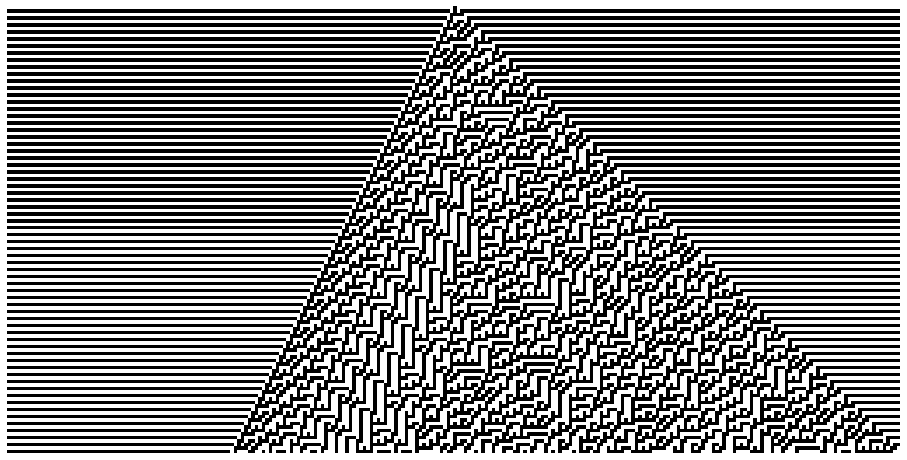

In [49]:
#A single 1 is initialized, with all other values set to zero.
w=256
initial = np.zeros(w)
initial[w//2] = 1
data = CA_run(initial, w//2, 45)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

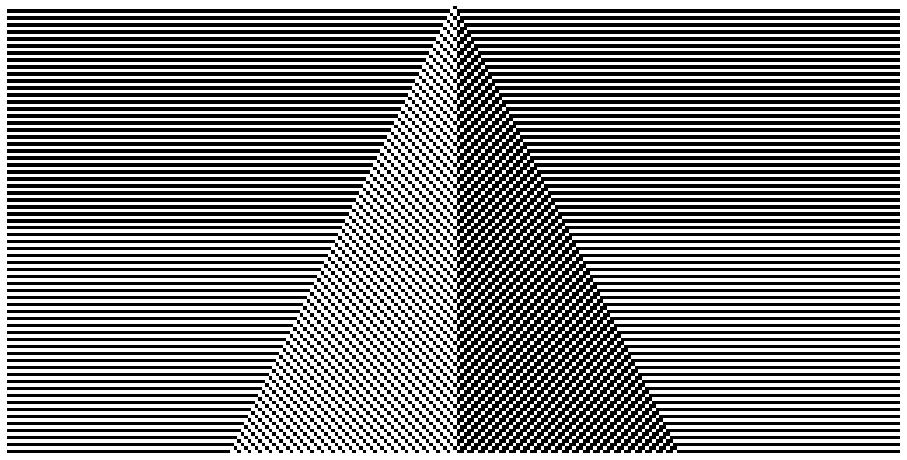

In [50]:
#A single 1 is initialized, with all other values set to zero.
w=256
initial = np.zeros(w)
initial[w//2] = 1
data = CA_run(initial, w//2, 57)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

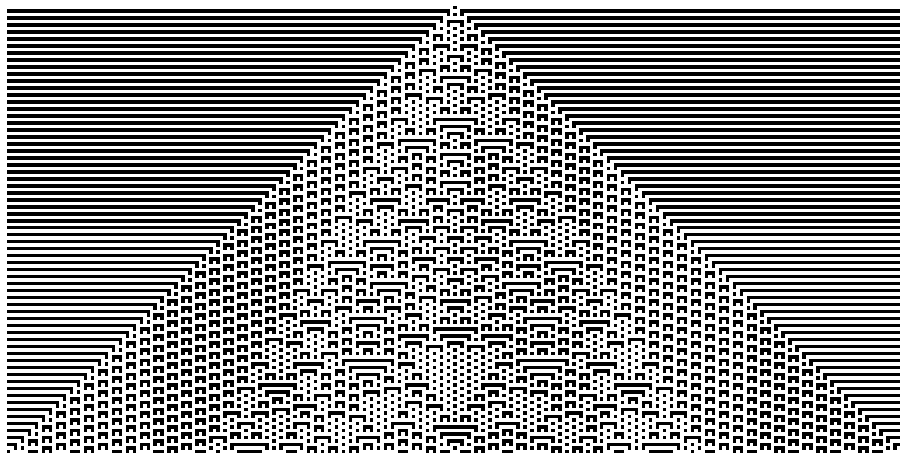

In [52]:
#A single 1 is initialized, with all other values set to zero.
w=256
initial = np.zeros(w)
initial[w//2] = 1
data = CA_run(initial, w//2, 73)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

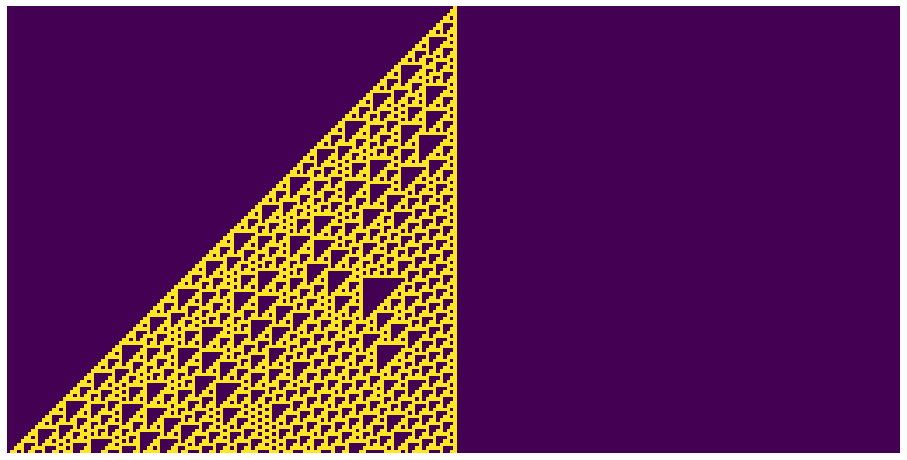

In [11]:
#A single 1 is initialized, with all other values set to zero.
w=256
initial = np.zeros(w)
initial[w//2] = 1
data = CA_run(initial, w//2, 110)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

https://ipython-books.github.io/122-simulating-an-elementary-cellular-automaton/

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
u = np.array([[4], [2], [1]])

def step(x, rule_b):
    """Compute a single step of an elementary cellular automaton"""
    # The columns contain the L, C, R values of all cells
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule
    return rule_b[7 - z]

def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given its rule (number between 0 and 255)"""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

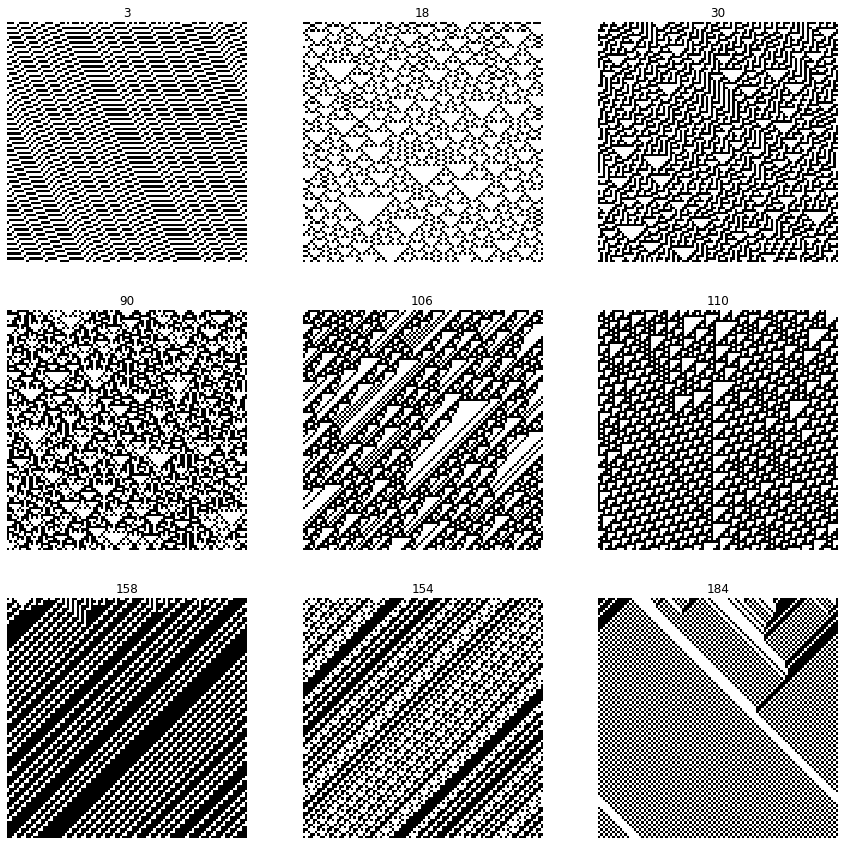

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
rules = [3, 18, 30,
         90, 106, 110,
         158, 154, 184]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))

### Autómatas Celulares en 2D con regla de solidificación

https://youtu.be/qPtKv9fSHZY

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


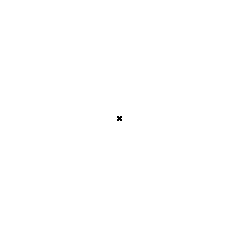

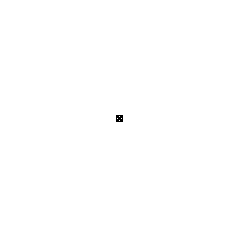

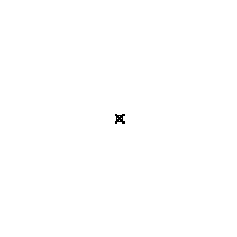

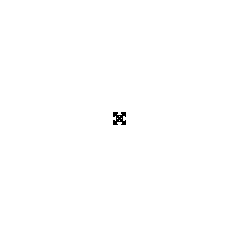

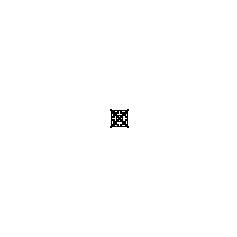

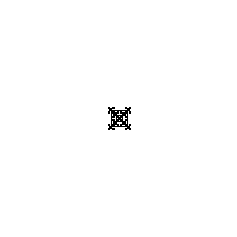

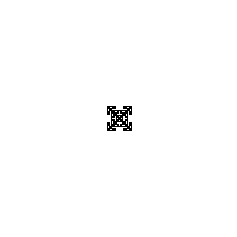

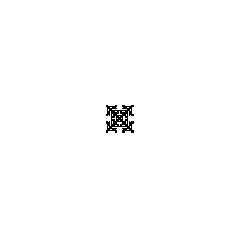

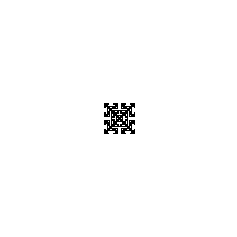

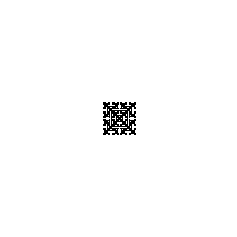

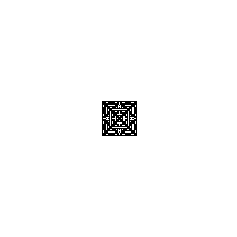

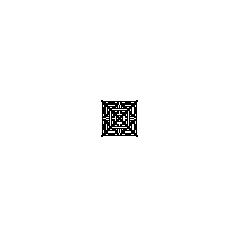

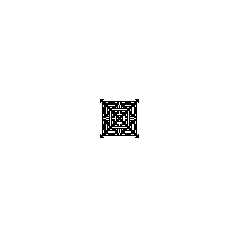

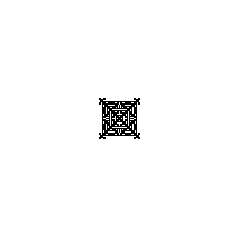

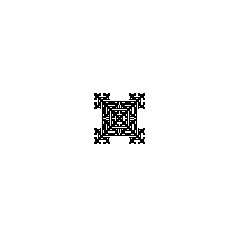

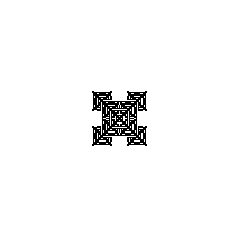

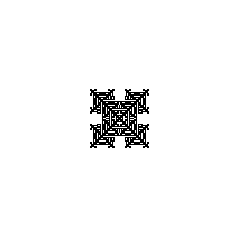

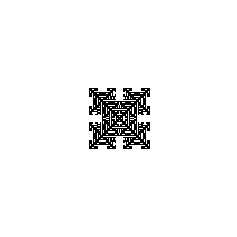

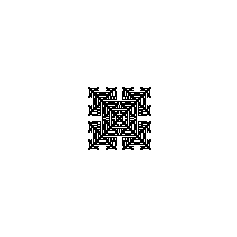

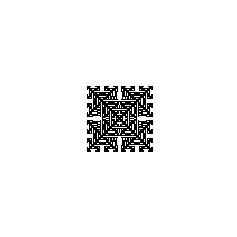

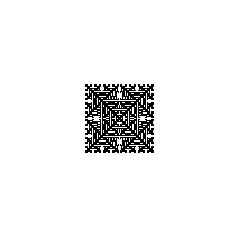

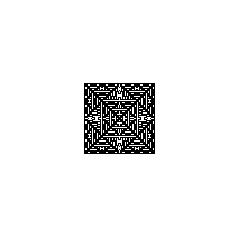

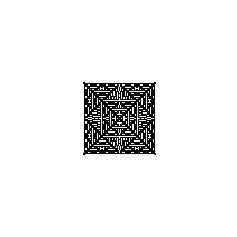

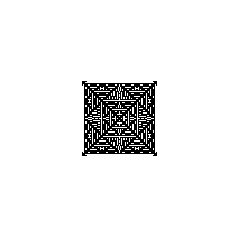

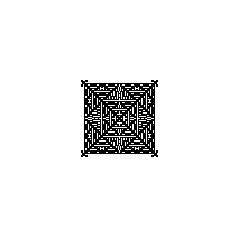

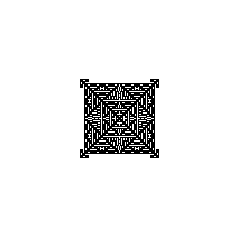

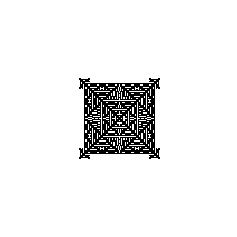

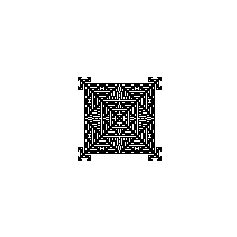

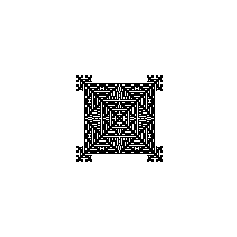

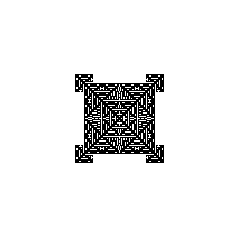

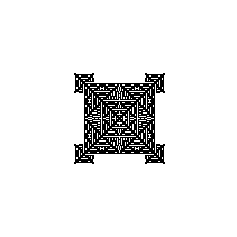

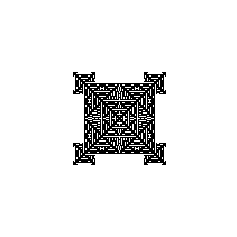

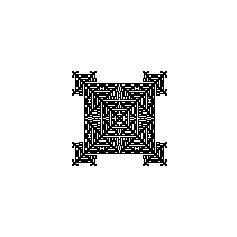

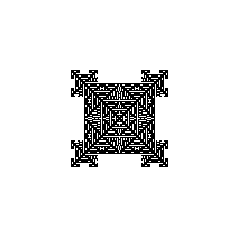

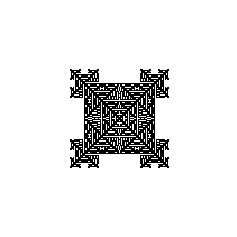

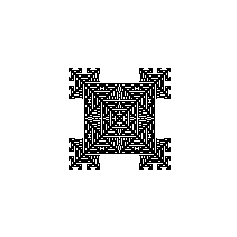

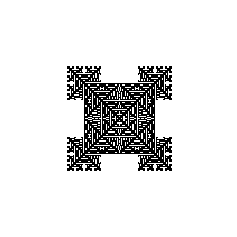

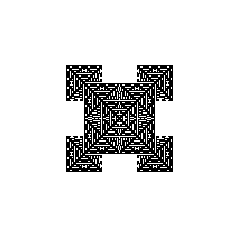

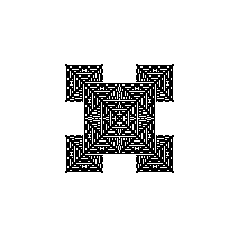

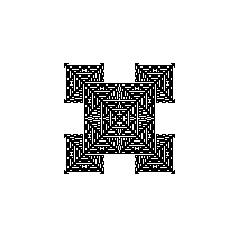

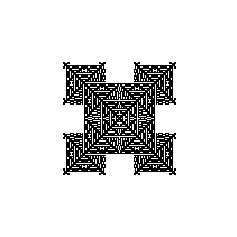

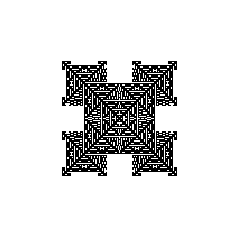

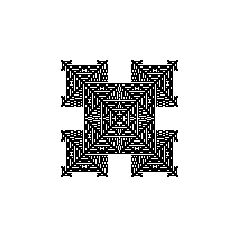

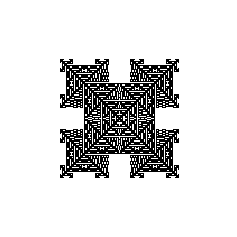

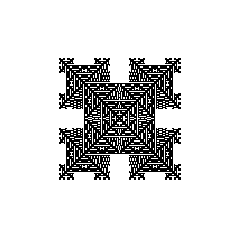

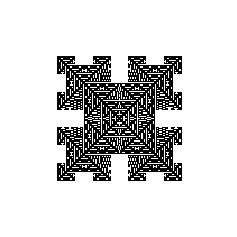

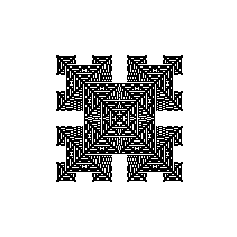

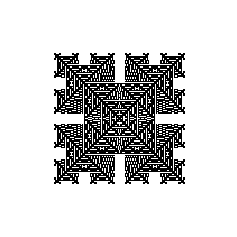

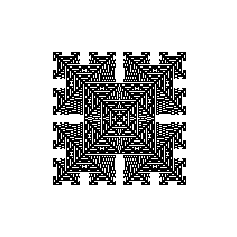

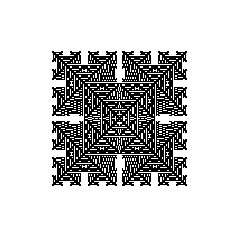

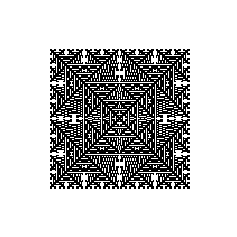

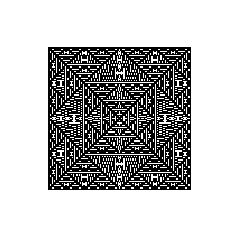

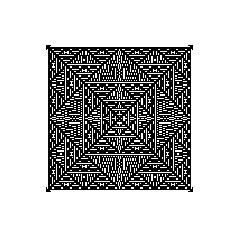

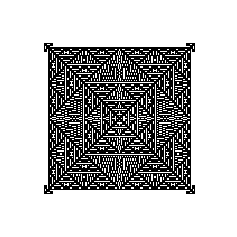

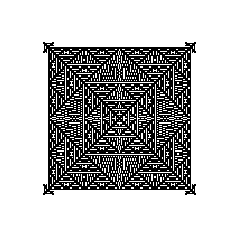

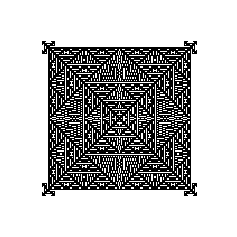

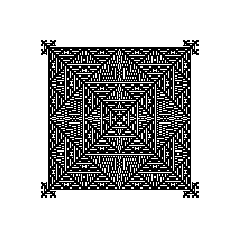

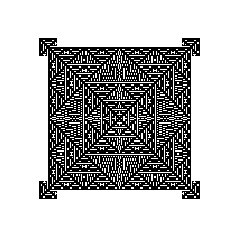

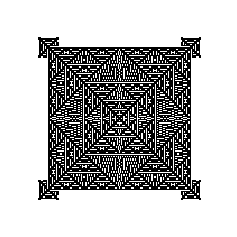

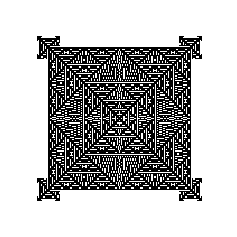

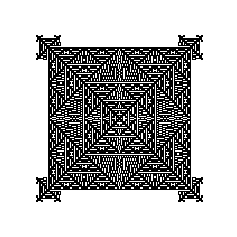

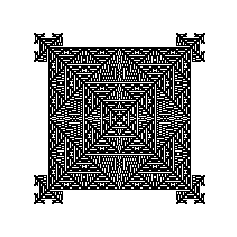

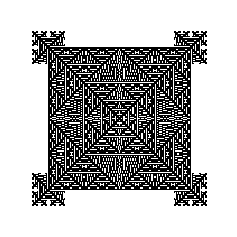

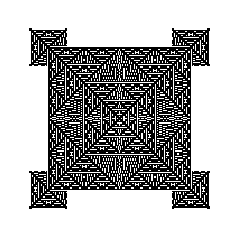

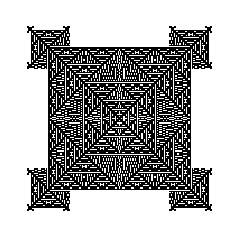

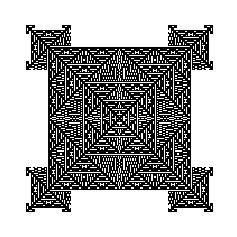

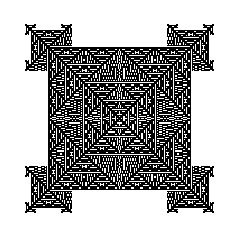

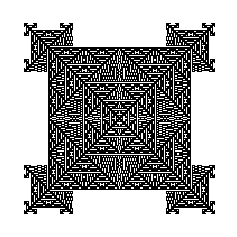

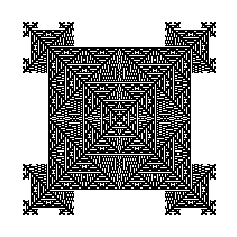

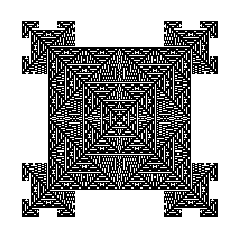

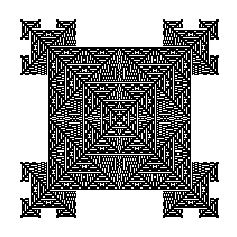

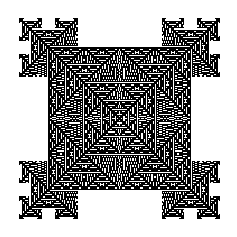

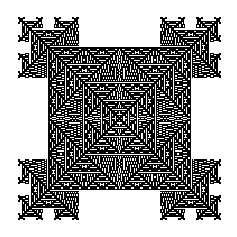

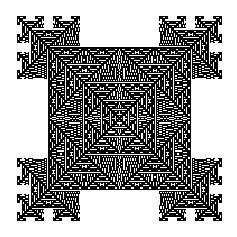

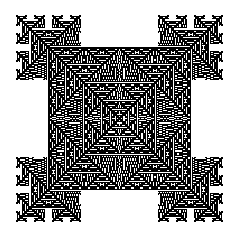

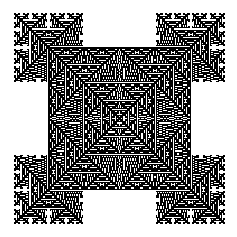

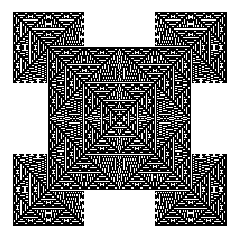

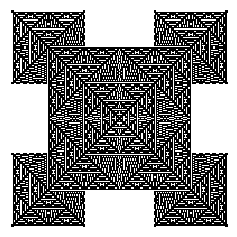

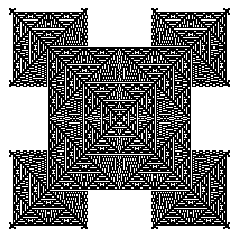

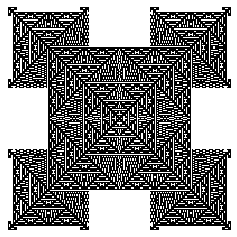

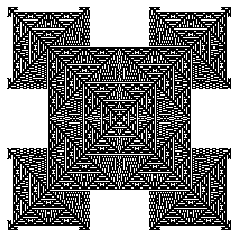

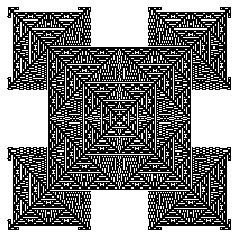

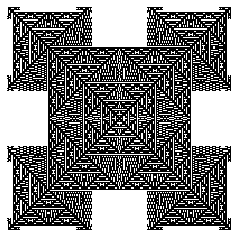

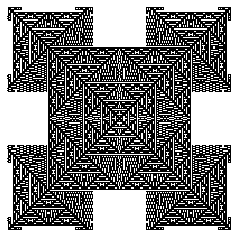

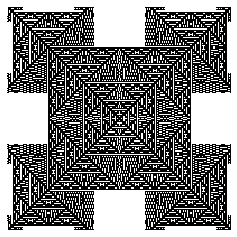

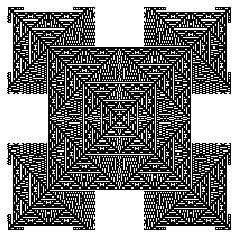

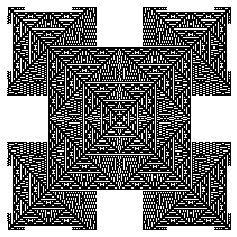

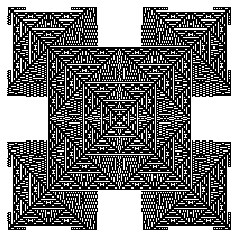

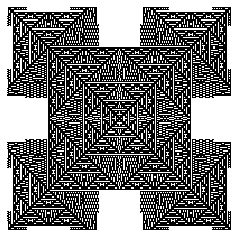

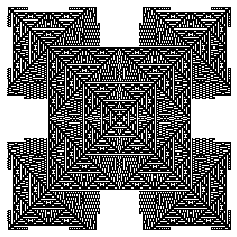

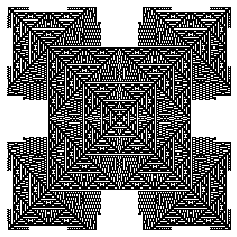

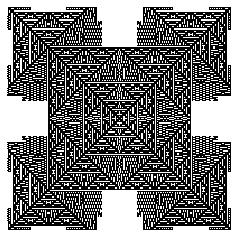

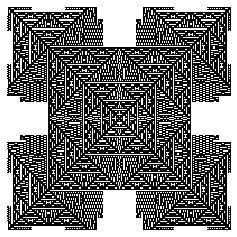

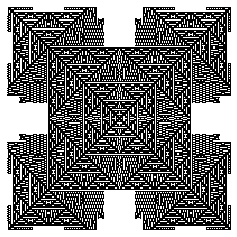

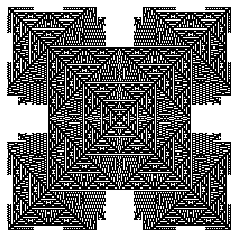

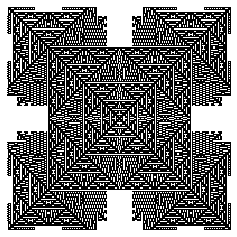

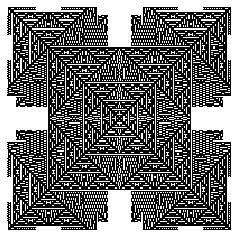

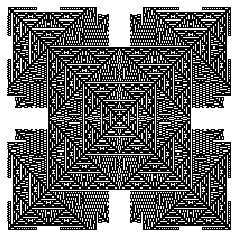

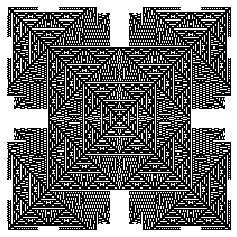

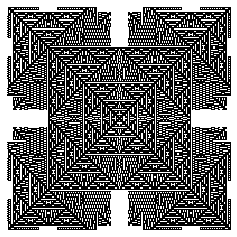

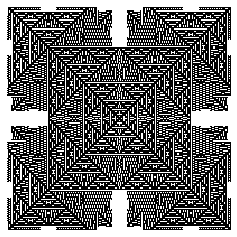

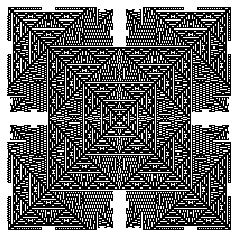

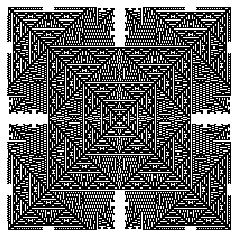

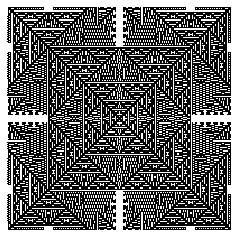

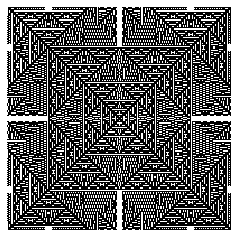

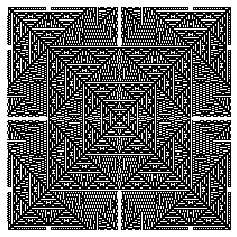

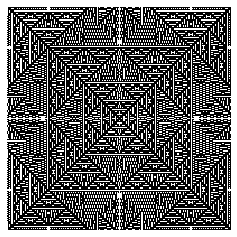

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, pygame
pygame.init()

#Tamaño de pantalla
size = width, height = 500, 500

#Número de celdas
n = 200
nX = n
nY = n

dimCW = (width - 1)/nX
dimCH = (height- 1)/nY

bg = 25, 25, 25

screen = pygame.display.set_mode(size)
screen.fill(bg)

#gameState = np.random.randint(0, 2, (nX, nY))

gameState = np.zeros((nX, nY))
gameState[int(n/2)-1,int(n/2)-1] = 1
gameState[int(n/2)-1,int(n/2)  ] = 1
gameState[int(n/2)-1,int(n/2)+1] = 1
gameState[int(n/2)  ,int(n/2)-1] = 1
gameState[int(n/2)  ,int(n/2)  ] = 1
gameState[int(n/2)  ,int(n/2)+1] = 1
gameState[int(n/2)+1,int(n/2)-1] = 1
gameState[int(n/2)+1,int(n/2)  ] = 1
gameState[int(n/2)+1,int(n/2)+1] = 1

#print(gameState)

#Ciclo para crear las celdas y la malla

#Fronteras periódicas

for i in range(126): #62 o 126 iteraciones están buenas
    
    pygame.event.pump()
    
    new_gameState = np.copy(gameState)
    screen.fill(bg)
    
    for y in range(0, nY):
        for x in range(0, nX):
            
            #Regla de Solidificación:
            #1. Si la celda está activa (estado 1) permanece activa
            #2. Si la celda está inactiva (estado 0) entonces se suman los estados de las celdas vecinas,
            #   si el número de celdas activadas en su entorno es 1 o 2, entonces la celda se activa,
            #   en caso contrario permanecerá desactivada
           
            ######FUNCIÓN PARA VER CUANTOS VECINOS DE [X,Y] ESTAN VIVOS
            
            n_neigh = gameState[(x-1) % nX, (y-1) % nY ] + \
                      gameState[(x)   % nX, (y-1) % nY ] + \
                      gameState[(x+1) % nX, (y-1) % nY ] + \
                      gameState[(x-1) % nX, (y)   % nY ] + \
                      gameState[(x)   % nX, (y)   % nY ] + \
                      gameState[(x+1) % nX, (y)   % nY ] + \
                      gameState[(x-1) % nX, (y+1) % nY ] + \
                      gameState[(x)   % nX, (y+1) % nY ] + \
                      gameState[(x+1) % nX, (y+1) % nY ]
            
            ######APLICACIÓN DE LAS REGLAS
            
            if gameState[x,y] == 1:
                new_gameState[x,y] = 1
                
            elif gameState[x,y] == 0 and (n_neigh == 1 or n_neigh == 2):
                new_gameState[x,y] = 1
            
            poly = [
                    ((x)*dimCW,   (y)*dimCH),
                    ((x+1)*dimCW, (y)*dimCH),
                    ((x+1)*dimCW, (y+1)*dimCH),
                    ((x)*dimCW,   (y+1)*dimCH)
                    ]
            
            pygame.draw.polygon(screen, (128, 128, 128), poly, int(abs(1-new_gameState[x,y])))

    gameState = new_gameState
        
    plt.rcParams['image.cmap'] = 'binary'
    plt.matshow(gameState)
    plt.axis('off')
    plt.show()         
    
    #pygame.display.flip()

Hay patrones muy interesantes en 2D

https://github.com/lantunes/cellpylib

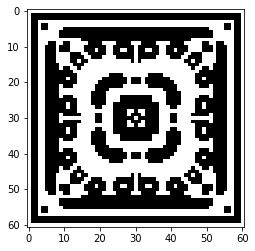

In [7]:
import cellpylib as cpl

# initialize a 60x60 2D cellular automaton 
cellular_automaton = cpl.init_simple2d(61, 61)

# evolve the cellular automaton for 30 time steps, 
#  applying totalistic rule 126 to each cell with a Moore neighbourhood
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=30, neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=126))

cpl.plot2d(cellular_automaton)

In [6]:
import cellpylib as cpl

# initialize a 60x60 2D cellular automaton 
cellular_automaton = cpl.init_simple2d(51, 51)

# evolve the cellular automaton for 30 time steps, 
#  applying totalistic rule 126 to each cell with a Moore neighbourhood
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=30, neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=30))

cpl.plot2d(cellular_automaton)

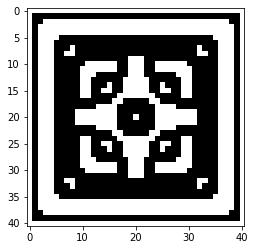

In [5]:
import cellpylib as cpl

# initialize a 60x60 2D cellular automaton 
cellular_automaton = cpl.init_simple2d(41, 41)

# evolve the cellular automaton for 30 time steps, 
#  applying totalistic rule 126 to each cell with a Moore neighbourhood
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=20, neighbourhood='Moore',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=30))

cpl.plot2d(cellular_automaton)

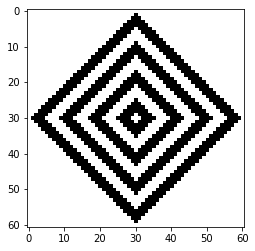

In [8]:
import cellpylib as cpl

# initialize a 60x60 2D cellular automaton 
cellular_automaton = cpl.init_simple2d(61, 61)

# evolve the cellular automaton for 30 time steps, 
#  applying totalistic rule 126 to each cell with a Moore neighbourhood
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=30, neighbourhood='von Neumann',
                                  apply_rule=lambda n, c, t: cpl.totalistic_rule(n, k=2, rule=30))

cpl.plot2d(cellular_automaton)

### Reversible Cellular Automata

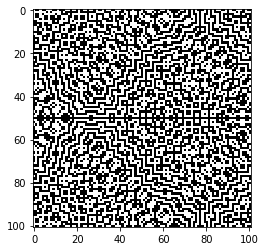

In [4]:
import cellpylib as cpl

cellular_automaton = cpl.init_random(101)
r = cpl.ReversibleRule(cellular_automaton[0], 90) #Regla 90

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=101, 
                                apply_rule=r.apply_rule)

cpl.plot(cellular_automaton)

In [3]:
import cellpylib as cpl

cellular_automaton = cpl.init_random(101)
r = cpl.ReversibleRule(cellular_automaton[0], 30) #Regla 30

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=101, 
                                apply_rule=r.apply_rule)

cpl.plot(cellular_automaton)

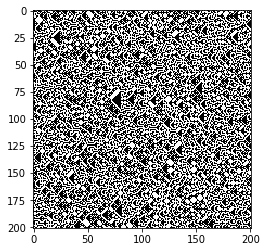

In [1]:
import cellpylib as cpl

cellular_automaton = cpl.init_random(201)
r = cpl.ReversibleRule(cellular_automaton[0], 30) #Regla 30

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=201, 
                                apply_rule=r.apply_rule)

cpl.plot(cellular_automaton)

### Game of Life

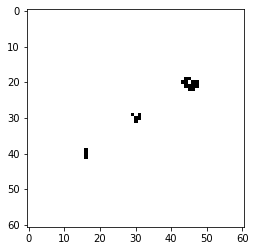

In [2]:
import cellpylib as cpl

# Glider
cellular_automaton = cpl.init_simple2d(61, 61)
cellular_automaton[:, [28,29,30,30], [30,31,29,31]] = 1

# Blinker
cellular_automaton[:, [40,40,40], [15,16,17]] = 1

# Light Weight Space Ship (LWSS)
cellular_automaton[:, [18,18,19,20,21,21,21,21,20], [45,48,44,44,44,45,46,47,48]] = 1

# evolve the cellular automaton for 60 time steps
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=60, neighbourhood='Moore',
                                  apply_rule=cpl.game_of_life_rule)

cpl.plot2d_animate(cellular_automaton)